In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
e2e_time_dir = '/mydata/iiswc24/lotus/lotustrace_vtune_result/e2e/'

In [21]:
data = {}

# walk through all files in the current directory
for root, dirs, files in os.walk(e2e_time_dir):
    for file in files:
        if file.endswith(".csv"):
            file_path = os.path.join(e2e_time_dir, file)
            print('Processing', file_path)
            # read file line by line
            for line in open(file_path).readlines():
                if 'Elapsed Time' in line:
                    elapsed_time = float(line.split(',')[2])
                    print('\tElapsed Time (s):', elapsed_time)
                    num_dataloaders = int(file.split('dataloader')[1].split('.')[0])
                    data[num_dataloaders] = elapsed_time
                    break

Processing /mydata/iiswc24/lotus/lotustrace_vtune_result/e2e/summary_b1024_gpu4_dataloader20.csv
	Elapsed Time (s): 688.914998


In [22]:
elapsed_time_df = pd.DataFrame(list(data.items()), columns=['Config', 'Elapsed Time (s)'])

In [23]:
# print column names
print("Column headings:")
print(elapsed_time_df.columns)

Column headings:
Index(['Config', 'Elapsed Time (s)'], dtype='object')


In [24]:
# sort by 'Config'
elapsed_time_df = elapsed_time_df.sort_values(by=['Config'])

In [25]:
# print elapsed_time_df
print(elapsed_time_df)

   Config  Elapsed Time (s)
0      20        688.914998


<Figure size 1000x500 with 0 Axes>

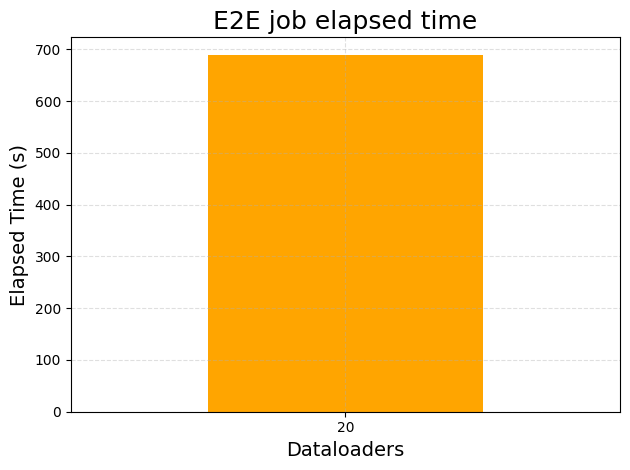

In [26]:
# plot the results
plt.figure(figsize=(10, 5))
# reduce bar width
elapsed_time_df.plot(kind='bar',x='Config', y='Elapsed Time (s)', color='orange')
# add title 
plt.title('E2E job elapsed time', fontsize=18)
# y axis label
plt.ylabel('Elapsed Time (s)', fontsize=14)
# x axis label
plt.xlabel('Dataloaders', fontsize=14)
# make x axis label horizontal
plt.xticks(rotation=0)
# add grid
plt.grid(alpha=.4, linestyle='--')
# remove legend
plt.legend().remove()
plt.tight_layout()